## Density-Based Spatial Clustering of Applications with Noise (DBSCAN) 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/vkr93/Data-Science-and-Machine-Learning-INDE-577---Spring-2024-/blob/main/Unsupervised%20Learning/2_DBSCAN/dbscan.ipynb)

In this notebook, Mall costumer data is clustered based on their annual income and spending score using [Mall Customer](dataset/Mall_Customers.csv) Dataset.

In [37]:
#Always importing the required packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [38]:
#import data 
data = pd.read_csv("/Users/vinodk/Documents/Rice Univeristy/4th semster/Data Science and ML /INDE 577 Repository/Data-Science-and-Machine-Learning-INDE-577---Spring-2024-/Unsupervised Learning/2_DBSCAN/Dataset/Mall_Customers.csv")

In [39]:
#Data Exploration
print(data.head())     # View the first few rows of the data

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [40]:
print(data.info())     # Get information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [41]:
print(data.describe()) # Get summary statistics of the data

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


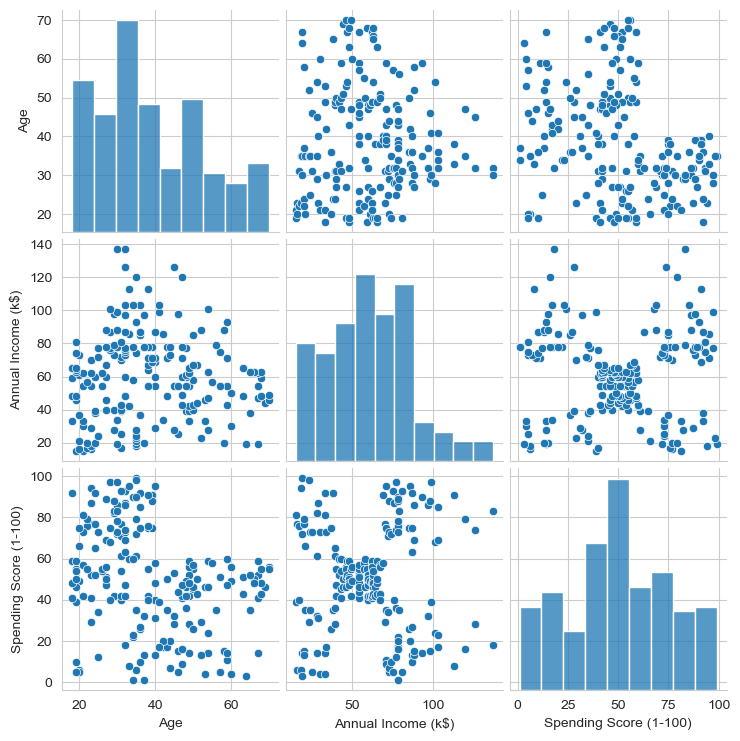

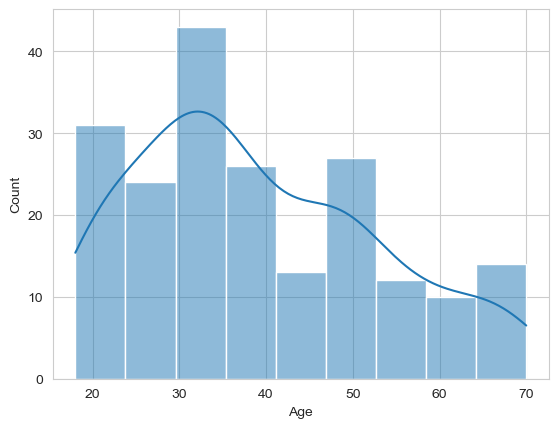

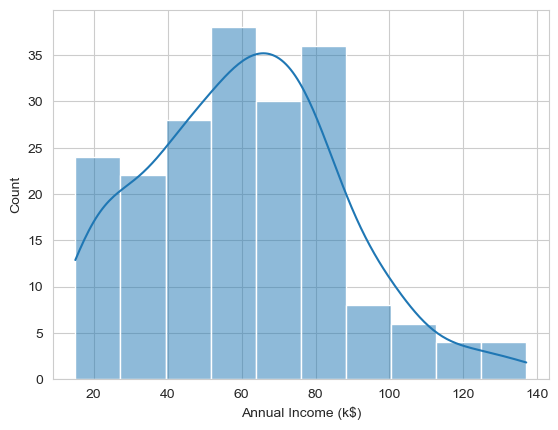

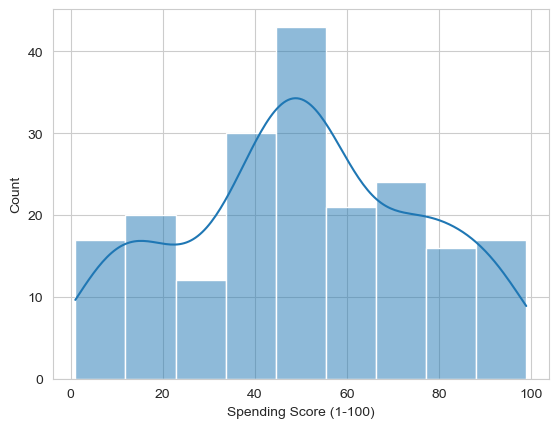

In [42]:
# Visualize the data
sns.set_style('whitegrid')
sns.pairplot(data, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()

sns.histplot(data, x='Age', kde=True)
plt.show()

sns.histplot(data, x='Annual Income (k$)', kde=True)
plt.show()

sns.histplot(data, x='Spending Score (1-100)', kde=True)
plt.show()

In [43]:
print(data.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [44]:
for col in data.columns:
    if data[col].dtype == 'object':
        print(f"{col} unique values: {data[col].unique()}")

Gender unique values: ['Male' 'Female']


In [45]:
data_numeric = data.select_dtypes(include=[float, int])

In [46]:
corr = data_numeric.corr()  # Compute correlation for numeric-only DataFrame


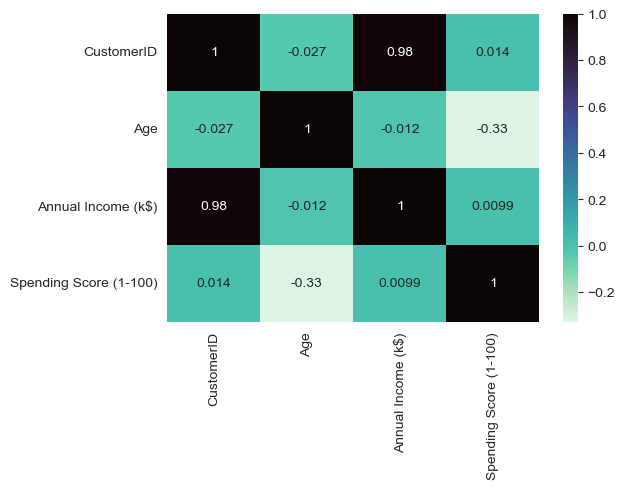

In [47]:
# Generate correlation matrix

data['Gender'] = (data['Gender'] == 'Male').astype(int) #encode the label into 1/0
corr = data_numeric.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()


### Summary of Data Exploration
Based on the data exploration and visualization of the Mall Customer Segmentation Data, here are some of the key findings:

1. There are 200 customers in the dataset, with ages ranging from 18 to 70 years old.
2. The average annual income of customers is around 60,000 USD, with a standard deviation of 26,264 USD.
3. The histplot() function shows that the majority of customers are in their 20s and 30s, with the number of customers declining as age increases.
4. The histplot() function also shows that the majority of customers have an annual income between 40,000 and 80,000 USD, with a smaller number of customers having a higher income.
5. The histplot() function shows that the majority of customers have a spending score between 40 and 60, indicating that they spend an average amount in the mall.

### Model Building
- The DBSCAN algorithm is a density-based clustering algorithm that groups together points that are closely packed together, marking as outliers points that lie alone in low-density regions.

- The DBSCAN algorithm requires two parameters: epsilon and minimum points. The epsilon parameter determines the maximum distance between two samples for one to be considered as in the neighborhood of the other. The minimum points parameter determines the minimum number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This means that only core samples are clustered.

- The paramters are tuned using the silhouette score and GridSearchCV.

**Silhouette Score:**
The Silhouette Coefficient ranges from -1 to 1, with higher values indicating better clustering. A score close to 1 indicates that the data points in a cluster are close to each other and far from other clusters. A score close to -1 indicates that the data points in a cluster are far from each other and close to other clusters. A score close to 0 indicates that the data points in a cluster are close to the decision boundary between two clusters.

In [48]:
X_train = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    if np.unique(labels).size == 1:
        return -1
    else:
        return silhouette_score(X, labels)

param_grid = {'eps': np.arange(1, 20, 0.5),
              'min_samples': np.arange(1, 12, 1)}

grid = GridSearchCV(DBSCAN(), param_grid=param_grid, scoring=silhouette_scorer)
grid.fit(X_train)

print('Best parameters:', grid.best_params_)
print('Best Silhouette Score:', grid.best_score_)

# Use the best hyperparameters to fit the DBSCAN algorithm
clustering = DBSCAN(eps=grid.best_params_['eps'], min_samples=grid.best_params_['min_samples']).fit(X_train)

Best parameters: {'eps': 13.5, 'min_samples': 8}
Best Silhouette Score: 0.48870784835966186


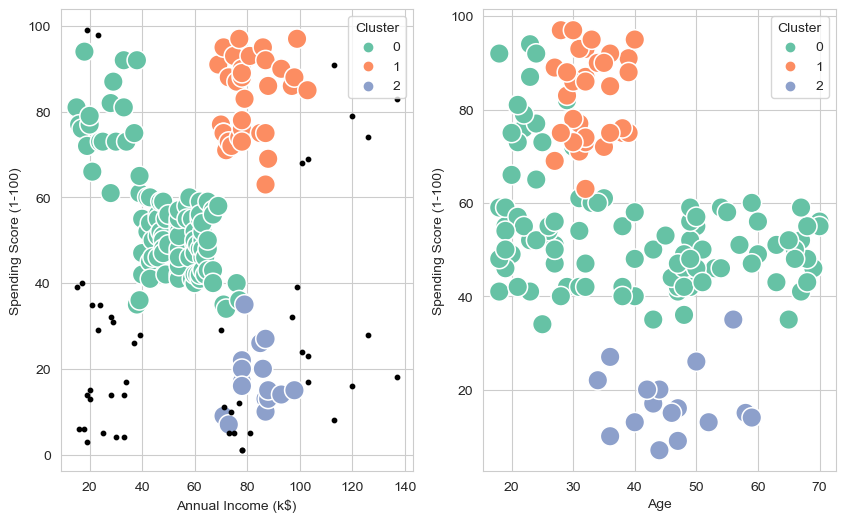

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined 'DBSCAN_dataset' and it contains the relevant data
# Define the figures and axes
fig2, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plotting without parameter conflict
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=DBSCAN_dataset[DBSCAN_dataset['Cluster'] != -1],
    hue='Cluster',
    ax=axes[0],
    palette='Set2',
    legend='full',
    s=200
)

sns.scatterplot(
    x='Age',
    y='Spending Score (1-100)',
    data=DBSCAN_dataset[DBSCAN_dataset['Cluster'] != -1],
    hue='Cluster',
    ax=axes[1],
    palette='Set2',
    legend='full',
    s=200
)

# Adding outliers to the first plot
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster'] == -1]
axes[0].scatter(
    outliers['Annual Income (k$)'],
    outliers['Spending Score (1-100)'],
    s=10,
    label='outliers',
    c="k"
)

plt.show()
